# Machine Learning Online Class Exercise 8 | Anomaly Detection and Collaborative Filtering

In [15]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
from numpy import linalg

from scipy.io import loadmat

## Part 1: Load Example Dataset

We start this exercise by using a small dataset that is easy to
visualize.

Our example case consists of 2 network server statistics across
several machines: the latency and throughput of each machine. This
exercise will help us find possibly faulty (or very fast) machines.

In [250]:
data1 = loadmat('ex8data1.mat')
X = data1['X']

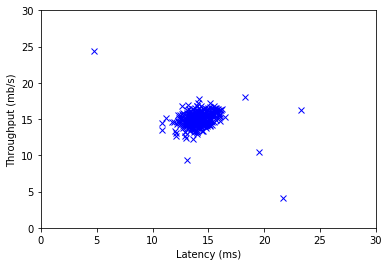

In [251]:
# Visualizing example dataset for outlier detection.

plt.plot(X[:, 0], X[:, 1], 'bx');
plt.axis([0, 30, 0, 30]);
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');

# Part 2: Estimate the dataset statistics

For this exercise, we assume a Gaussian distribution for the dataset.

We first estimate the parameters of our assumed Gaussian distribution,
then compute the probabilities for each of the points and then
visualize both the overall distribution and where each of the points
falls in terms of that distribution.

In [252]:
def estimate_gaussian(X):
    '''This function estimates the parameters of a Gaussian distribution using the data in X'''
    m, n = X.shape
    mu = np.sum(X, axis=0) / m
    sigma = np.var(X, axis=0)
    
    return mu, sigma

def multivariate_gaussian(X, mu, sigma2):
    '''Computes the probability density function of the multivariate gaussian distribution.'''
    k = mu.shape[0]
    if len(sigma2.shape)== 1 or sigma2.shape[0] == 1:
        sigma2 = np.diag(sigma2)
    X -= mu.T

    return np.power((2 * np.pi), (-k / 2.0)) * np.power(linalg.det(sigma2), -.5) * \
            np.exp(-.5  * np.sum(X.dot(linalg.pinv(sigma2)) * X, axis=1))

def select_threadhold(yval, pval):
    '''Find the best threshold (epsilon) to use for selecting.'''
    best_epsilon = 0
    best_F1 = 0
    step_size = (max(pval) - min(pval)) / 1000
    
    for epsilon in range(min(pval), max(pval), step_size):
        cv_pred = pval < epsilon
        tp = sum((cv_pred == 1) & (yval == 1))
        fp = sum((cv_pred == 1) & (yval == 0))
        fn = sum((cv_pred == 0) & (yval == 1))
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        
        F1 = (2 * precision * recall) / (precision + recall)
        
        if F1 > best_F1:
            best_epsilon = epsilon
            best_F1 = F1
        
    return best_epsilon, best_F1

def visulize_fit(X, mu, sigma2):
    '''Visualize the dataset and its estimated distribution.'''
    X1, X2 = np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
    Z = multivariate_gaussian(np.vstack([X1.flat, X2.flat]).T, mu, sigma2).reshape(X1.shape)
    plt.plot(X[:, 0], X[:, 1], 'bx')
    
    if np.all(np.isinf(Z) == 0):
        plt.contour(X1, X2, Z, np.power(10.0, np.arange(-20, 0, 3).T))

In [253]:
mu, sigma2 = estimate_gaussian(X)

(71, 71)


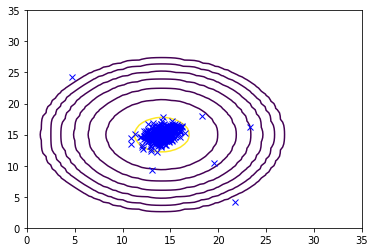

In [254]:
visulize_fit(X, mu, sigma2)